# Dijkstra & Kruskal
05113009 哲學四 吳家瑩<br>
* [Dijkstra & Kruskal原理說明](#Dijkstra-&-Kruskal原理說明)<br>
* [流程圖](#流程圖)<br>
* [程式碼](#程式碼)<br>
* [學習歷程](#學習歷程)<br>
* [參考資料](#參考資料)<br>

## Dijkstra & Kruskal原理說明

### Dijkstra



Dijkstra演算法為指定一個點到其他點的最短路徑（單源最短路徑），最簡單的執行方法就是將每個節點在不經過其他節點的情況下，到其他節點的權重(weight/cost)儲存在串列或陣列裡，因此有幾個節點就需要進行多少次搜尋，時間複雜度為O(V²)。

<br>

    1. 先將所有節點到其他節點（不經過其他節點）的權重存到串列或陣列中，若是無法到達則紀錄∞
    2. 選定起點(a)，將(a)能到達的點之權重先加入最短路徑中，並找出串列或陣列中距離最近的點(b)，並確定為最短路徑
    3. 從(a)->(b)->？，將(b)能走到的點之權重加入（a->b->c的權重總和），若為已尋訪過的節點則判斷（a->b->c）是否小於（a->c），如果小於
        則更新最短路徑的權重，最後再找出未確定節點中距離最近的點。
    4. 重複執行步驟3，直到全部都確定為起點到任一點的最短路徑為止。
    
   [流程圖](#Dijkstra流程圖)
    
    時間複雜度：O(V²)   V:節點個數

### Kruskal

Kruskal演算法是一種用來尋找無向圖中最小生成樹（Minimum Spanning Tree）的演算法，亦即找出圖中邊權重最小的樹，且每個點都要包含在其中，但不需要考慮root應該為哪個點、樹是否有平衡或是樹高大小等等，只需要找出最小權重總和的樹即可。用來解決同樣問題的還有前面Prim演算法和Boruvka演算法等，和Boruvka演算法不同的地方是，Kruskal演算法在圖中存在相同權重的邊時也有效。

    1. 先把每個節點都當成一棵樹
    2. 再來排序所有邊的權重，由小到大（最小生成樹）
    3. 若兩節點分別為不同的樹，此條邊則為MST的邊
    4. 反之若為同一顆樹，連結此邊會產生loop，因此應該捨去這條邊
    
   [流程圖](#Kruskal流程圖)
    
    *** 可能不只有一個解，只要權重為最小即可
    時間複雜度：O(ElogE)或者O(ElogV)

<br>

## 流程圖

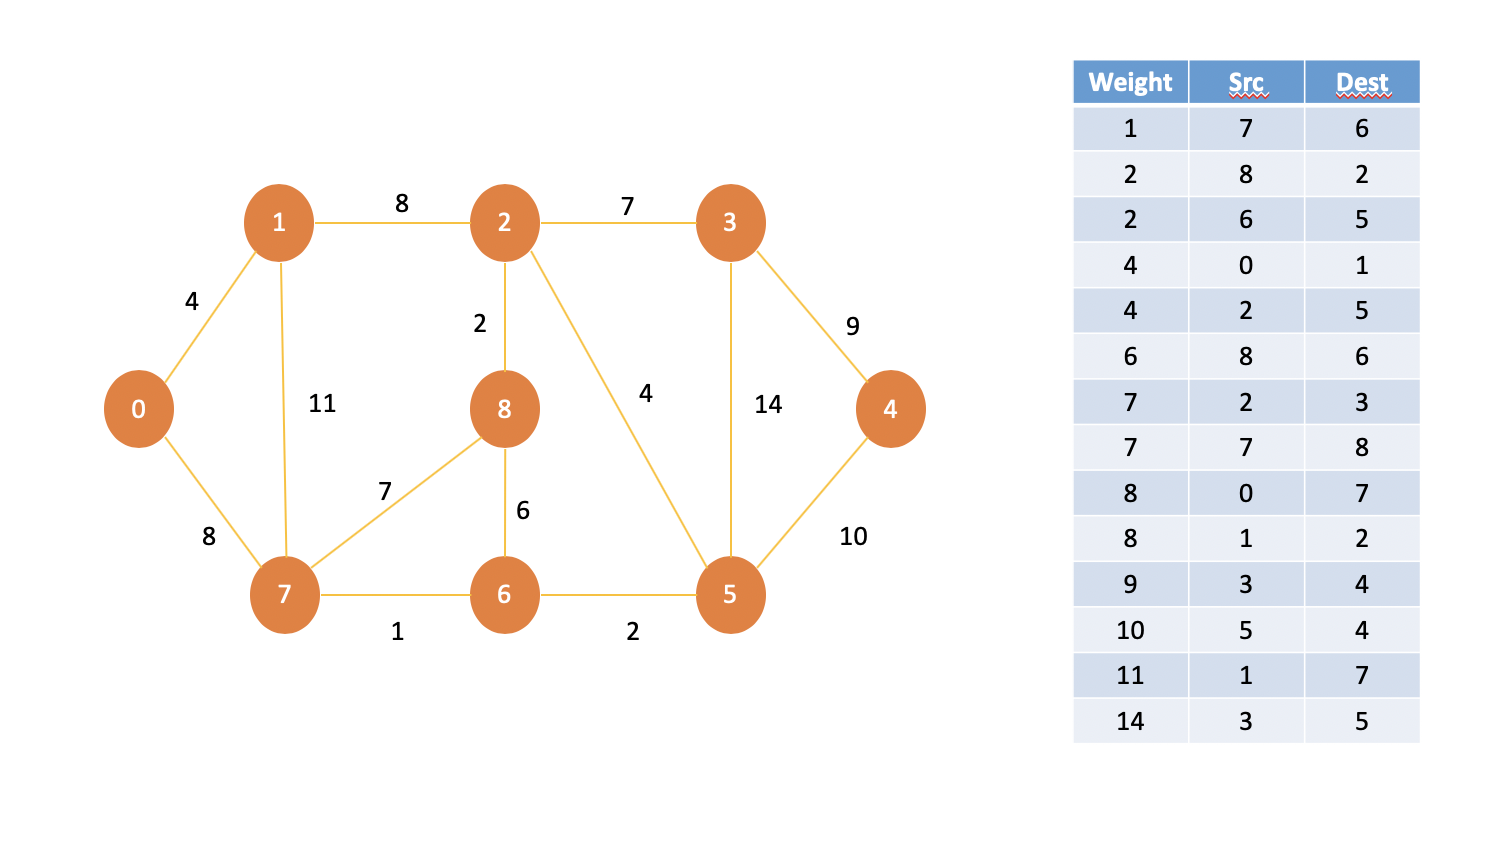

In [391]:
from IPython.display import Image
Image(filename='圖例.png',width = '70%')

圖片參考來源：https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

### Dijkstra流程圖

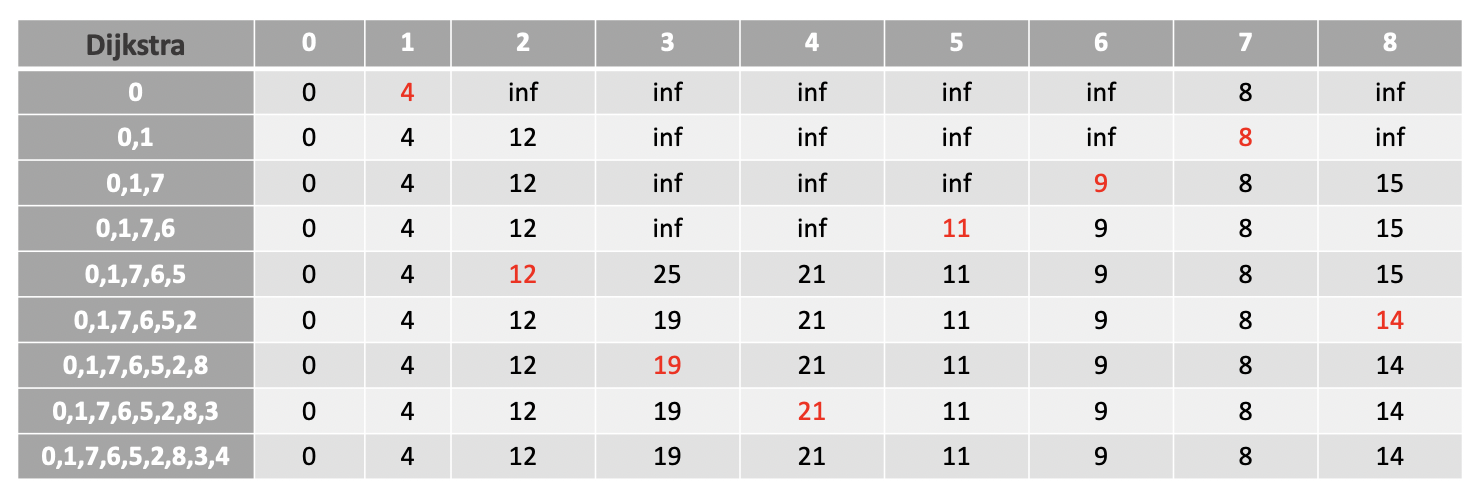

In [389]:
from IPython.display import Image
Image(filename='Dijkstra.png',width = '70%')

根據每個點到點的權重，依序挑選權重最小的路徑，找出一開始選定的點到任何一點的最短距離。

<br>

### Kruskal流程圖

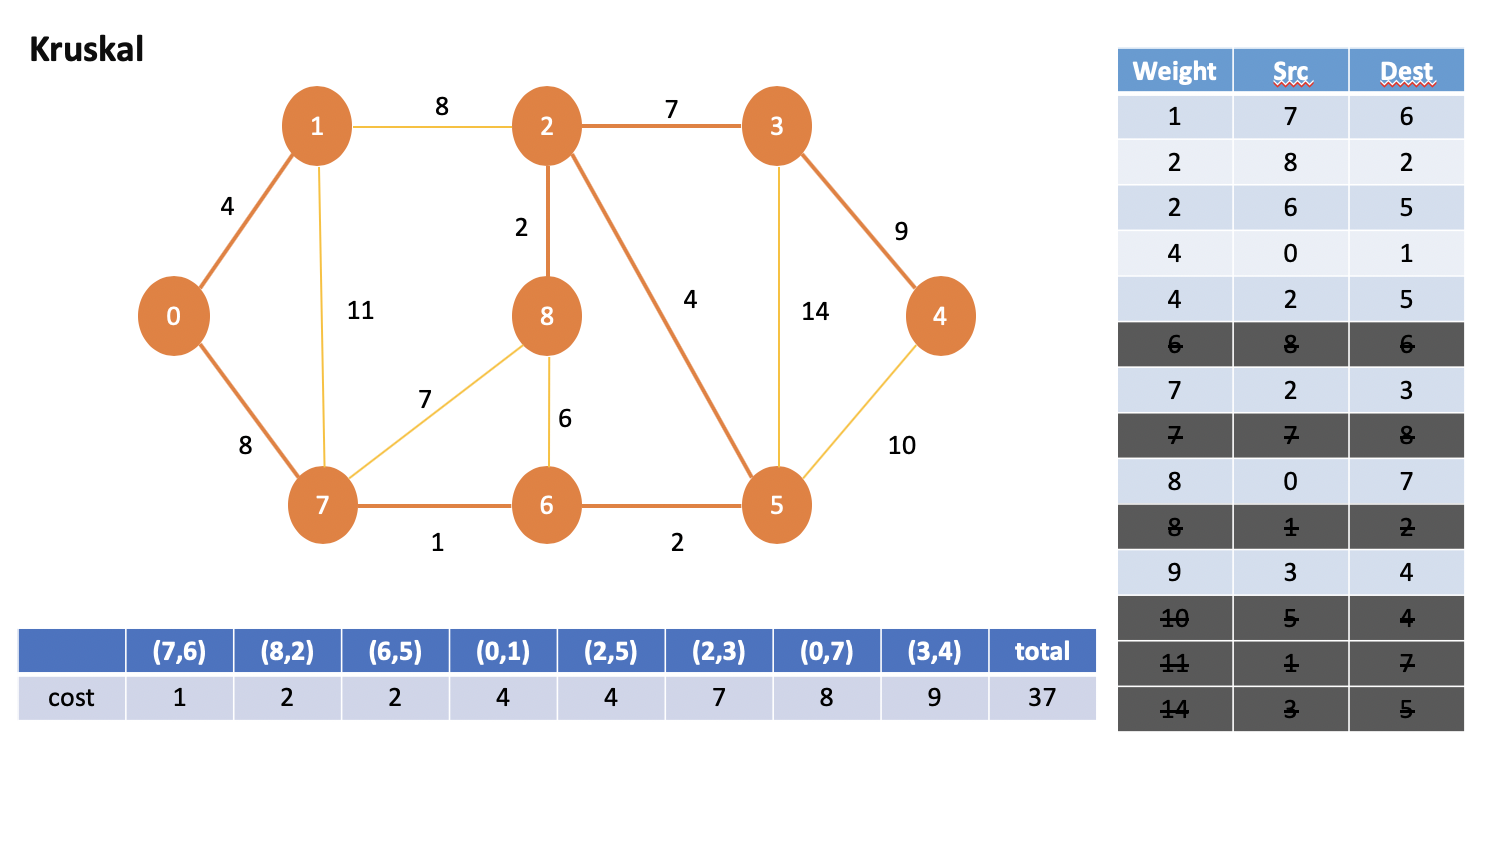

In [390]:
from IPython.display import Image
Image(filename='Kruskal.png',width = '70%')

**找出連結所有點的最短路徑**，並且不能形成迴圈，過程中就是很多小樹不斷地合併成一棵大樹。

<br>

## 程式碼

In [601]:
# Python program for Dijkstra's single  
# source shortest path algorithm. The program is  
# for adjacency matrix representation of the graph 
# Python program for Kruskal's algorithm to find 
# Minimum Spanning Tree of a given connected,  
# undirected and weighted graph 

from collections import defaultdict 

#Class to represent a graph 
class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)] 
        self.tempp = {}
        self.temp = []
    def addEdge(self,u,v,w): 
        self.tempp.setdefault('%d-%d'%(u,v),w)
        self.temp.append([u,v,w])
        
        """
        :type u,v,w: int
        :rtype: None
        """
    def Dijkstra(self, s): 
        temp1 = [float('inf') if i == 0 else i for i in g.graph[s]]
        minone = min(temp1)
        temp1[s] = 0
        temp2 = [s] # 走訪過的點
        idx1 = temp1.index(minone)
        
        while len(temp2) < self.V:
            temp2.append(idx1)
            for i in range(self.V):
                if self.graph[idx1][i] != 0 and temp1[i] == float('inf'):
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]

                if self.graph[idx1][i] != 0 and temp1[i] != float('inf') and self.graph[idx1][i] + temp1[idx1] < temp1[i]:
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    
            a = [i for i in temp1]
            minone = min(a)
            idx1 = a.index(minone)
            while idx1  in temp2 and a:
                a.remove(minone)
                if a:
                    minone = min(a)
                    idx1 = temp1.index(minone)
        
        output = {}
        for i,x in zip(range(self.V), temp1):
            output['%d'%i] = x
            
        return output
                             
        
        """
        :type s: int
        :rtype: dict
        """
    def Kruskal(self):
        temp = self.temp
        sort_temp = sorted(temp, key=lambda x:x[2]) #dict.values()排序
        parent = [-1]*self.V
        outlist = []
        
        root = sort_temp[0][0]
        n2 = sort_temp[0][1]
        parent[n2] = root
        visited = [root,n2]
        outlist.append(sort_temp[0])

        
        for i in range(1,len(sort_temp)):
            n1 = sort_temp[i][0]
            n2 = sort_temp[i][1]
            
            if n1 in visited and n2 in visited:
                if parent[n1] == parent[n2] and parent[n1] != -1:
                    continue
                    
                if n1 == root or n2 == root:
                    if n1 == root:
                        if parent[n2] == root:
                            continue
                            
                        parent = self.change_p_r(n1,n2,parent)   
                        outlist.append(sort_temp[i])
                        continue
                        
                    if n2 == root:
                        if parent[n1] == root:
                            continue
                            
                        parent = self.change_p_r(n2,n1,parent)
                        outlist.append(sort_temp[i])
                        continue
                        
                else: 
                    
                    if parent[n1] == root:
                        parent = self.changeparent(n1,n2,parent)
                        outlist.append(sort_temp[i])
                        continue  
                        
                    if parent[n2] == root:
                        parent = self.changeparent(n2,n1,parent)
                        outlist.append(sort_temp[i])
                        continue
                        
                    parent = self.changeparent(n1,n2,parent)
                    outlist.append(sort_temp[i])
                    continue
                    
                    
            if n1 == root:
                parent[n2] = parent[n1]
                visited.append(n2)
                outlist.append(sort_temp[i])
                continue
            
            if n2 == root:
                parent[n1] = parent[n2]
                visited.append(n1)
                outlist.append(sort_temp[i])
                continue
            
                    
            if n1 in visited or n2 in visited:
                if n1 in visited:
                    parent[n2] = parent[n1]
                    visited.append(n2)
                    outlist.append(sort_temp[i])
                    continue
                else:
                    parent[n1] = parent[n2]
                    visited.append(n1)
                    outlist.append(sort_temp[i])
                    continue                   
                               
            parent[n2] = n1
            visited.append(n1)
            visited.append(n2)
            outlist.append(sort_temp[i])
                               
        output = {}
        for i,j,x in outlist :
            if i > j:
                a = i
                i = j
                j = a
            output['%d-%d'%(i,j)] = x
        return(output)
             
        
        """
        :rtype: dict
        """
    
    def changeparent(self,a,b,parent):
        a = parent[a]
        if parent[b] == -1:
            parent[b] = a
            parent = [a if i == b else i for i in parent]
            
        else:
            np = parent[b]
            parent[np] = a
            parent = [a if i == np else i for i in parent]
        
        return parent
    
    def change_p_r(self,a,b,parent):
        if parent[b] == -1:
            parent[b] = a
            parent = [a if i == b else i for i in parent]
            
        else:
            np = parent[b]
            parent[np] = a
            parent = [a if i == np else i for i in parent]
        
        return parent
    

<br>

### 測資 🚗

### Dijkstra

In [137]:
g = Graph(9)
g.graph = [[0,4,0,0,0,0,0,8,0],
          [4,0,8,0,0,0,0,11,0],
          [0,8,0,7,0,4,0,0,2],
          [0,0,7,0,9,14,0,0,0],
          [0,0,0,9,0,10,0,0,0],
          [0,0,4,14,10,0,2,0,0],
          [0,0,0,0,0,2,0,1,6],
          [8,11,0,0,0,0,1,0,7],
          [0,0,2,0,0,0,6,7,0]]

In [100]:
g.Dijkstra(0)

[0, 1]
[0, 1, 7]
[0, 1, 7, 6]
[0, 1, 7, 6, 5]
[0, 1, 7, 6, 5, 2]
[0, 1, 7, 6, 5, 2, 8]
[0, 1, 7, 6, 5, 2, 8, 3]
[0, 1, 7, 6, 5, 2, 8, 3, 4]


[0, 4, 12, 19, 21, 11, 9, 8, 14]

In [92]:
g.Dijkstra(0)

[0, 4, 12, 19, 21, 11, 9, 8, 14]

In [93]:
g.Dijkstra(1)

[4, 0, 8, 15, 22, 12, 12, 11, 10]

In [94]:
g.Dijkstra(2)

[12, 8, 0, 7, 14, 4, 6, 7, 2]

In [106]:
g.Dijkstra(0)

{'0': 0, '1': 4, '2': 12, '3': 19, '4': 21, '5': 11, '6': 9, '7': 8, '8': 14}

In [596]:
q = Graph(4)

In [597]:
q.addEdge(0,1,10)
q.addEdge(0,2,6)
q.addEdge(0,3,5)
q.addEdge(1,3,15)
q.addEdge(2,3,4)

In [598]:
q.Kruskal()

{'2-3': 4, '0-3': 5, '0-1': 10}

### Kruskal

In [604]:
w = Graph(9)
w.addEdge(7,6,1)
w.addEdge(8,2,2)
w.addEdge(6,5,2)
w.addEdge(3,5,14)
w.addEdge(1,7,11)
w.addEdge(5,4,10)
w.addEdge(3,4,9)
w.addEdge(0,7,8) #
w.addEdge(0,1,4)
w.addEdge(2,5,4)
w.addEdge(8,6,6)
w.addEdge(1,2,8) #
w.addEdge(2,3,7)
w.addEdge(7,8,7)

In [605]:
w.Kruskal()

{'6-7': 1,
 '2-8': 2,
 '5-6': 2,
 '0-1': 4,
 '2-5': 4,
 '2-3': 7,
 '0-7': 8,
 '3-4': 9}

✏️ addEdge 順序可能不同會有不同答案

In [602]:
t = Graph(9)
t.addEdge(7,6,1)
t.addEdge(8,2,2)
t.addEdge(6,5,2)
t.addEdge(3,5,14)
t.addEdge(1,7,11)
t.addEdge(5,4,10)
t.addEdge(3,4,9)
t.addEdge(0,1,4)
t.addEdge(2,5,4)
t.addEdge(8,6,6)
t.addEdge(1,2,8) #
t.addEdge(0,7,8) #
t.addEdge(2,3,7)
t.addEdge(7,8,7)

In [603]:
t.Kruskal()

{'6-7': 1,
 '2-8': 2,
 '5-6': 2,
 '0-1': 4,
 '2-5': 4,
 '2-3': 7,
 '1-2': 8,
 '3-4': 9}

✏️ 雖然最後答案不同，但是總權重是相同的，皆為37，所以皆為MST。

<br>

## 學習歷程

### Dijkstra - 錯誤 ❌

In [ ]:
    def Dijkstra(self, s): 
        temp1 = [float('inf') if i == 0 else i for i in g.graph[s]]
        minone = min(temp1)
        temp1[s] = 0
        temp2 = [s] # 走訪過的點
        idx1 = temp1.index(minone)
        
        while len(temp2) <= self.V:
            print('m',minone)
            temp2.append(idx1)
            print(temp2)
            for i in range(self.V):
                if self.graph[idx1][i] != 0 and temp1[i] == float('inf'):
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('1',temp1)

                if  self.graph[idx1][i] + temp1[idx1] < temp1[i]:
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('2',temp1)
                    
            a = [i for i in temp1]
            minone = min(a)
            idx1 = a.index(minone)
            while idx1  in temp2 :
                a.remove(minone)
                minone = min(a)
            
        return temp1

In [71]:
g.Dijkstra(0)

m 4
[0, 1]
1 [0, 4, 12, inf, inf, inf, inf, 8, inf]
2 [0, 4, 12, 4, inf, inf, inf, 8, inf]
2 [0, 4, 12, 4, 4, inf, inf, 8, inf]
2 [0, 4, 12, 4, 4, 4, inf, 8, inf]
2 [0, 4, 12, 4, 4, 4, 4, 8, inf]
2 [0, 4, 12, 4, 4, 4, 4, 8, 4]


ValueError: min() arg is an empty sequence

✏️list 是空的，怎麼會這樣勒 😂<br>
檢查一下程式碼，發現的確有可能一直刪，刪到最後list為空，自然也不會有最小值。<br>
更改程式碼如下👇 新增條件 ---> if a:

<br>

In [ ]:
    def Dijkstra(self, s): 
        temp1 = [float('inf') if i == 0 else i for i in g.graph[s]]
        minone = min(temp1)
        temp1[s] = 0
        temp2 = [s] # 走訪過的點
        idx1 = temp1.index(minone)
        
        while len(temp2) <= self.V:
            print('m',minone)
            temp2.append(idx1)
            print(temp2)
            for i in range(self.V):
                if self.graph[idx1][i] != 0 and temp1[i] == float('inf'):
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('1',temp1)

                if  self.graph[idx1][i] + temp1[idx1] < temp1[i]:
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('2',temp1)
                    
            a = [i for i in temp1]
            minone = min(a)
            idx1 = a.index(minone)
            while idx1  in temp2 :
                a.remove(minone)
                if a:
                    minone = min(a)
            
        return temp1
            

In [80]:
g.Dijkstra(0)

m 4
[0, 1]
1 [0, 4, 12, inf, inf, inf, inf, 8, inf]
2 [0, 4, 12, 4, inf, inf, inf, 8, inf]
2 [0, 4, 12, 4, 4, inf, inf, 8, inf]
2 [0, 4, 12, 4, 4, 4, inf, 8, inf]
2 [0, 4, 12, 4, 4, 4, 4, 8, inf]
2 [0, 4, 12, 4, 4, 4, 4, 8, 4]


ValueError: list.remove(x): x not in list

✏️「 ValueError: list.remove(x): x not in list 」---> 代表刪到最後，list可能會變成空的，所以需要多設條件避免這種狀況發生。<br>
些微更動後的程式碼如下 👇

<br>

In [ ]:
    def Dijkstra(self, s): 
        temp1 = [float('inf') if i == 0 else i for i in g.graph[s]]
        minone = min(temp1)
        temp1[s] = 0
        temp2 = [s] # 走訪過的點
        idx1 = temp1.index(minone)
        
        while len(temp2) <= self.V:
            print('m',minone)
            temp2.append(idx1)
            print(temp2)
            for i in range(self.V):
                if self.graph[idx1][i] != 0 and temp1[i] == float('inf'):
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('1',temp1)

                if  self.graph[idx1][i] + temp1[idx1] < temp1[i]:
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('2',temp1)
                    
            a = [i for i in temp1]
            minone = min(a)
            idx1 = a.index(minone)
            while idx1  in temp2 and a:
                a.remove(minone)
                if a:
                    minone = min(a)
            
        return temp1

In [51]:
g.Dijkstra(0)

m 4
[0, 1]
1 [0, 4, 12, inf, inf, inf, inf, 8, inf]
2 [0, 4, 12, 4, inf, inf, inf, 8, inf]
2 [0, 4, 12, 4, 4, inf, inf, 8, inf]
2 [0, 4, 12, 4, 4, 4, inf, 8, inf]
2 [0, 4, 12, 4, 4, 4, 4, 8, inf]
2 [0, 4, 12, 4, 4, 4, 4, 8, 4]
m 12
[0, 1, 0]
2 [0, 4, 0, 4, 4, 4, 4, 8, 4]
2 [0, 4, 0, 0, 4, 4, 4, 8, 4]
2 [0, 4, 0, 0, 0, 4, 4, 8, 4]
2 [0, 4, 0, 0, 0, 0, 4, 8, 4]
2 [0, 4, 0, 0, 0, 0, 0, 8, 4]
2 [0, 4, 0, 0, 0, 0, 0, 8, 0]
m 8
[0, 1, 0, 0]
m 8
[0, 1, 0, 0, 0]
m 8
[0, 1, 0, 0, 0, 0]
m 8
[0, 1, 0, 0, 0, 0, 0]
m 8
[0, 1, 0, 0, 0, 0, 0, 0]
m 8
[0, 1, 0, 0, 0, 0, 0, 0, 0]
m 8
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 4, 0, 0, 0, 0, 0, 8, 0]

✏️根據跑出來的結果，發現權重更新有誤，代表程式碼打錯了。<br>
最小值一直沒更動，而且後面尋訪的點怎麼全部都是0<br>
還有權重也都變成0，理論上來說不應該會有這樣的情況，最後幾次尋訪的點也都是節點8，這不合理，經過觀察又嘗試修改程式碼👇

<br>

In [ ]:
    def Dijkstra(self, s): 
        temp1 = [float('inf') if i == 0 else i for i in g.graph[s]]
        minone = min(temp1)
        temp1[s] = 0
        temp2 = [s] # 走訪過的點
        idx1 = temp1.index(minone)
        
        while len(temp2) <= self.V:
            print('m',minone)
            temp2.append(idx1)
            print(temp2)
            for i in range(self.V):
                if self.graph[idx1][i] != 0 and temp1[i] == float('inf'):
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('1',temp1)

                if self.graph[idx1][i] != 0 and temp1[i] != float('inf') and self.graph[idx1][i] + temp1[idx1] < temp1[i]:
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('2',temp1)
                    
            a = [i for i in temp1]
            minone = min(a)
            idx1 = a.index(minone)
            while idx1  in temp2 and a:
                a.remove(minone)
                if a:
                    minone = min(a)
            
        return temp1

In [56]:
g.Dijkstra(0)

m 4
[0, 1]
1 [0, 4, 12, inf, inf, inf, inf, 8, inf]
m inf
[0, 1, 0]
m inf
[0, 1, 0, 0]
m inf
[0, 1, 0, 0, 0]
m inf
[0, 1, 0, 0, 0, 0]
m inf
[0, 1, 0, 0, 0, 0, 0]
m inf
[0, 1, 0, 0, 0, 0, 0, 0]
m inf
[0, 1, 0, 0, 0, 0, 0, 0, 0]
m inf
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 4, 12, inf, inf, inf, inf, 8, inf]

✏️因為前面不正常的變更了每個點到起點的距離，因此決定修改條件式為：<br>
 if self.graph[idx1][i] != 0 and temp1[i] != float('inf') and self.graph[idx1][i] + temp1[idx1] < temp1[i]<br>
 結果的是，權重的確沒有被修改了，但是每次尋訪的最小權重，竟然是inf，亦即目前從起點出發，還無法走到這個點😂<br>
 這次看來是決定下一個點的時候出錯了，查看一下👇

<br>

In [86]:
g.Dijkstra(0)

idx 1
m 4
[0, 1]
1 [0, 4, 12, inf, inf, inf, inf, 8, inf]
idx 0
m inf
[0, 1, 0]
idx 0
m inf
[0, 1, 0, 0]
idx 0
m inf
[0, 1, 0, 0, 0]
idx 0
m inf
[0, 1, 0, 0, 0, 0]
idx 0
m inf
[0, 1, 0, 0, 0, 0, 0]
idx 0
m inf
[0, 1, 0, 0, 0, 0, 0, 0]
idx 0
m inf
[0, 1, 0, 0, 0, 0, 0, 0, 0]
idx 0
m inf
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 4, 12, inf, inf, inf, inf, 8, inf]

✏️將每次走的點都print出來以後，發現index 皆為0 🧐<br>
看來是我取index的過程有問題，看了程式碼以後才發現，我變更下一個走訪的點時，忘記更新index了，難怪index總為0，因為一開始判斷最小權重就是起點，我測試的起點就是從0開始，0離0肯定是最近的，因此當我沒有更新index時，index永遠都會是0，至於下一個點的權重一直為inf，也正是因為從頭到尾尋訪的點一直都是起點，所以權重並沒有更新成功，inf就是走不到的點，最後回傳的結果才會是[0, 4, 12, inf, inf, inf, inf, 8, inf] 😂<br>
知道問題後，馬上添加 idx1 = temp1.index(minone) 👇

## 答對了 ⭕️

In [ ]:
    def Dijkstra(self, s): 
        temp1 = [float('inf') if i == 0 else i for i in g.graph[s]]
        minone = min(temp1)
        temp1[s] = 0
        temp2 = [s] # 走訪過的點
        idx1 = temp1.index(minone)
        
        while len(temp2) < self.V:
            print('m',minone)
            temp2.append(idx1)
            print(temp2)
            for i in range(self.V):
                if self.graph[idx1][i] != 0 and temp1[i] == float('inf'):
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('1',temp1)

                if self.graph[idx1][i] != 0 and temp1[i] != float('inf') and self.graph[idx1][i] + temp1[idx1] < temp1[i]:
                    temp1[i] = self.graph[idx1][i] + temp1[idx1]
                    print('2',temp1)
                    
            a = [i for i in temp1]
            minone = min(a)
            idx1 = a.index(minone)
            print('idx',idx1)
            while idx1  in temp2 and a:
                a.remove(minone)
                if a:
                    minone = min(a)
                    idx1 = temp1.index(minone)
            
        return temp1

In [62]:
g.Dijkstra(0)

m 4
[0, 1]
1 [0, 4, 12, inf, inf, inf, inf, 8, inf]
idx 0
m 8
[0, 1, 7]
1 [0, 4, 12, inf, inf, inf, 9, 8, inf]
1 [0, 4, 12, inf, inf, inf, 9, 8, 15]
idx 0
m 9
[0, 1, 7, 6]
1 [0, 4, 12, inf, inf, 11, 9, 8, 15]
idx 0
m 11
[0, 1, 7, 6, 5]
1 [0, 4, 12, 25, inf, 11, 9, 8, 15]
1 [0, 4, 12, 25, 21, 11, 9, 8, 15]
idx 0
m 12
[0, 1, 7, 6, 5, 2]
2 [0, 4, 12, 19, 21, 11, 9, 8, 15]
2 [0, 4, 12, 19, 21, 11, 9, 8, 14]
idx 0
m 14
[0, 1, 7, 6, 5, 2, 8]
idx 0
m 19
[0, 1, 7, 6, 5, 2, 8, 3]
idx 0
m 21
[0, 1, 7, 6, 5, 2, 8, 3, 4]
idx 0
m 21
[0, 1, 7, 6, 5, 2, 8, 3, 4, 4]
idx 0


[0, 4, 12, 19, 21, 11, 9, 8, 14]

✏️修改程式碼後，確定每個點都有走過，雖然index還是0，不過那是因為我放print的地方放錯了，才會這樣😂<br>
最後再將答案用dict呈現，如下👇

<br>

In [100]:
g.Dijkstra(0)

[0, 1]
[0, 1, 7]
[0, 1, 7, 6]
[0, 1, 7, 6, 5]
[0, 1, 7, 6, 5, 2]
[0, 1, 7, 6, 5, 2, 8]
[0, 1, 7, 6, 5, 2, 8, 3]
[0, 1, 7, 6, 5, 2, 8, 3, 4]


[0, 4, 12, 19, 21, 11, 9, 8, 14]

📌依序尋訪的點，並且找出從0到各個點的最短距離。

In [106]:
g.Dijkstra(0)

{'0': 0, '1': 4, '2': 12, '3': 19, '4': 21, '5': 11, '6': 9, '7': 8, '8': 14}

📌最後將答案與節點儲存成dict的格式，方便查詢與觀看。完整程式碼在此 👉👉👉 [💻](#程式碼)
<br>成功啦！我好棒🎉🎉🎉

### Kruskal - 錯誤 ❌

In [ ]:
    def Kruskal(self):
        temp = self.temp
        print(temp)
        sort_temp = sorted(temp.items(), key=lambda temp:temp[1]) #dict.values()排序
        print(sort_temp)
        parent = [-1]*self.V
        


        a = list(sort_temp[0])
        a = list(map(int,(a[0].split('-'))))
        parent[a[1]] = a[0]
        
        temp2 = [] #走訪過的
        temp2.extend(a)
        print(temp2)
        
        
        while temp2 < self.V:
            a = list(sort_temp[1])
            a = list(map(int,(a[1].split('-'))))
            temp2.extend(a)

In [ ]:
temp2 = [] #走訪過的
        a = list(sort_temp[0])
        a = list(map(int,(a[0].split('-'))))
        temp2.extend(a)
        print(temp2)

✏️其實一開始也不知道自己在寫什麼😂，這是亂寫一通，希望可以從中找尋靈感。已經好久沒有在寫作業的時候，遇到不知道要如何下手的狀況。

<br>

In [378]:
q.addEdge(0,1,10)
q.addEdge(0,2,6)
q.addEdge(0,3,5)
q.addEdge(1,3,15)
q.addEdge(2,3,4)

{'0-1': 10}
{'0-1': 10, '0-2': 6}
{'0-1': 10, '0-2': 6, '0-3': 5}
{'0-1': 10, '0-2': 6, '0-3': 5, '1-3': 15}
{'0-1': 10, '0-2': 6, '0-3': 5, '1-3': 15, '2-3': 4}


In [316]:
q.Kruskal()

{'0-1': 10, '0-2': 6, '0-3': 5, '1-3': 15, '2-3': 4}
[('2-3', 4), ('0-3', 5), ('0-2', 6), ('0-1', 10), ('1-3', 15)]
5
4
5
6
10
15


✏️決定先把東西print出來觀察一下格式等等有沒有正確，<br>
第一個是addEdge後的dict，<br>
第二個是將dict根據每個點到點的權重進行排序，<br>
再來是長度，還有每一個權重都抓出來看看，確定我能將權重從dict成功取出。

<br>

👇開始著手主要程式碼的部分，心想不知道要怎麼用簡單的方式打出來，因此就用最簡單粗暴的方式，將每個條件都設出來。

In [ ]:
    def Kruskal(self):
        temp = self.temp
        print(temp)
        sort_temp = sorted(temp, key=lambda x:x[2]) #dict.values()排序
        print(sort_temp)
        parent = [-1]*self.V
        outlist = []
        
        root = sort_temp[0][0]
        n2 = sort_temp[0][1]
        parent[n2] = root
        visited = [root,n2]
        outlist.append(sort_temp[0])

        
        for i in range(1,len(sort_temp)):
            n1 = sort_temp[i][0]
            n2 = sort_temp[i][1]
            
            if n1 in visited and n2 in visited:
                print('no:',n1,n2)
                continue
                
            if n1 == root or n2 == root:
                if n1 == root:
                    parent[n2] = root
                    visited.append(n2)
                    outlist.append(sort_temp[i])
                    continue
                else:
                    parent[n1] = root
                    visited.append(n1)
                    outlist.append(sort_temp[i])
                    continue
                    
            if n1 in visited or n2 in visited:
                if n1 in visited:
                    parent[n2] = parent[n1]
                    visited.append(n2)
                    outlist.append(sort_temp[i])
                    continue
                else:
                    parent[n1] = parent[n2]
                    visited.append(n1)
                    outlist.append(sort_temp[i])
                    continue
            
            parent[n2] = n1
            visited.append(n1)
            visited.append(n2)
            outlist.append(sort_temp[i])
                      
        print(visited)
        print(parent)
        output = {}
        for i,j,x in outlist :
            output['%d-%d'%(i,j)] = x
        return(output)

In [378]:
q.addEdge(0,1,10)
q.addEdge(0,2,6)
q.addEdge(0,3,5)
q.addEdge(1,3,15)
q.addEdge(2,3,4)

{'0-1': 10}
{'0-1': 10, '0-2': 6}
{'0-1': 10, '0-2': 6, '0-3': 5}
{'0-1': 10, '0-2': 6, '0-3': 5, '1-3': 15}
{'0-1': 10, '0-2': 6, '0-3': 5, '1-3': 15, '2-3': 4}


In [379]:
q.Kruskal()

[[0, 1, 10], [0, 2, 6], [0, 3, 5], [1, 3, 15], [2, 3, 4]]
[[2, 3, 4], [0, 3, 5], [0, 2, 6], [0, 1, 10], [1, 3, 15]]
no: 0 2
no: 1 3
[2, 3, 0, 1]
[2, 2, -1, 2]


{'2-3': 4, '0-3': 5, '0-1': 10}

✏️費盡千辛萬苦，真的想了好久好久，好不容易想出了這粗暴的方法，的確也把程式碼打出來了，<br>
雖然非常冗長與雜亂，但是這才像是我自己慢慢想出來的，我一個一個條件設想，將每一個條件都打上去，<br>
用了助教範例的測資，結果回傳的東西是正確的，看似美好的結果，天真的以為我真的可以休息了，<br>
卻在我決定更改一下測資以確保程式碼的正確性時，發生了變化......

<br>

👇新測資的複雜程度up⬆up⬆

In [380]:
w = Graph(9)
w.addEdge(7,6,1)
w.addEdge(8,2,2)
w.addEdge(6,5,2)
w.addEdge(3,5,14)
w.addEdge(1,7,11)
w.addEdge(5,4,10)
w.addEdge(3,4,9)
w.addEdge(0,1,4)
w.addEdge(2,5,4)
w.addEdge(8,6,6)
w.addEdge(1,2,8)
w.addEdge(2,3,7)
w.addEdge(7,8,7)
w.addEdge(0,7,8)

{'7-6': 1}
{'7-6': 1, '8-2': 2}
{'7-6': 1, '8-2': 2, '6-5': 2}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9, '0-1': 4}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9, '0-1': 4, '2-5': 4}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9, '0-1': 4, '2-5': 4, '8-6': 6}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9, '0-1': 4, '2-5': 4, '8-6': 6, '1-2': 8}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9, '0-1': 4, '2-5': 4, '8-6': 6, '1-2': 8, '2-3': 7}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 11, '5-4': 10, '3-4': 9, '0-1': 4, '2-5': 4, '8-6': 6, '1-2': 8, '2-3': 7, '7-8': 7}
{'7-6': 1, '8-2': 2, '6-5': 2, '3-5': 14, '1-7': 1

✏️一樣將每次新增後的結果print出來，以確保添加成功。

<br>

In [385]:
w.Kruskal()

[[7, 6, 1], [8, 2, 2], [6, 5, 2], [3, 5, 14], [1, 7, 11], [5, 4, 10], [3, 4, 9], [0, 1, 4], [2, 5, 4], [8, 6, 6], [1, 2, 8], [2, 3, 7], [7, 8, 7], [0, 7, 8]]
[[7, 6, 1], [8, 2, 2], [6, 5, 2], [0, 1, 4], [2, 5, 4], [8, 6, 6], [2, 3, 7], [7, 8, 7], [1, 2, 8], [0, 7, 8], [3, 4, 9], [5, 4, 10], [1, 7, 11], [3, 5, 14]]
no: 2 5
no: 8 6
no: 7 8
no: 1 2
no: 0 7
no: 5 4
no: 1 7
no: 3 5
[7, 6, 8, 2, 5, 0, 1, 3, 4]
[-1, 0, 8, 8, 8, 7, 7, -1, -1]


{'6-7': 1, '2-8': 2, '5-6': 2, '0-1': 4, '2-3': 7, '3-4': 9}

❗️答案少了'2-5':4, '0-7':8 這兩條邊 😭<br>
因為 if n1 in visited and n2 in visited 條件句將某些兩個都造訪過的點直接排除，但有可能這條就是連結兩棵樹的重要路徑。<br>
目前遇到最大的問題就是不知道怎麼處理形成loop的情況，不知道要如何判斷與排除這種可能性，<br>
我已經盡力設了一堆條件了，結果把該使用的邊也排除了，心好累😭😭😭

<br>

In [ ]:
if n1 in visited and n2 in visited:
                if parent[n1] != parent[n2]:
                    if parent[n1] == root:
                        parent[n2] = root
                        outlist.append(sort_temp[i])
                        continue
                    if parent[n2] == root:
                        parent[n1] = root
                        outlist.append(sort_temp[i])
                        continue
                    else:
                        parent[n2] = parent[n1]
                        outlist.append(sort_temp[i])
                        continue
                        
                print('no:',n1,n2)
                continue

✏️一不做二不休，決定繼續努力，於是在原本的 if n1 in visited and n2 in visited 條件式下又新增了好幾個條件，希望能夠成功🙏。

<br>

In [388]:
w.Kruskal()

[[7, 6, 1], [8, 2, 2], [6, 5, 2], [3, 5, 14], [1, 7, 11], [5, 4, 10], [3, 4, 9], [0, 1, 4], [2, 5, 4], [8, 6, 6], [1, 2, 8], [2, 3, 7], [7, 8, 7], [0, 7, 8]]
[[7, 6, 1], [8, 2, 2], [6, 5, 2], [0, 1, 4], [2, 5, 4], [8, 6, 6], [2, 3, 7], [7, 8, 7], [1, 2, 8], [0, 7, 8], [3, 4, 9], [5, 4, 10], [1, 7, 11], [3, 5, 14]]
no: 5 4
no: 1 7
no: 3 5
[7, 6, 8, 2, 5, 0, 1, 3, 4]
[7, 7, 7, 7, 7, 7, 7, 7, 7]


{'6-7': 1,
 '2-8': 2,
 '5-6': 2,
 '0-1': 4,
 '2-5': 4,
 '6-8': 6,
 '2-3': 7,
 '7-8': 7,
 '1-2': 8,
 '0-7': 8,
 '3-4': 9}

✏️果然世界並沒有那麼美好，新增條件後，答案比之前多好幾個邊了，原本應該存在被我排除的邊，這次沒有被排除了，<br>
但同時也納入了不應該存在的邊，加入這些邊會產生迴圈，而且（邊數）應該要為（點-1）才對，所以我失敗了。😩😩😩<br>
不知道又過了多久......

查資料中偶然看到了一段文字：<br>
「如何判斷是否選取的邊形成循環？這時需要使用集合的概念，剛開始每一個點都是一個集合，每個集合都只有一個元素，當加入最小生成樹的邊，邊的兩端點節點屬於同一個集合，就會形成循環，該邊不能是最小生成樹的邊。」<br>
給我了一些想法💡，馬上嘗試一下！

In [ ]:
    def Kruskal(self):
        temp = self.temp
        print(temp)
        sort_temp = sorted(temp, key=lambda x:x[2]) #dict.values()排序
        print(sort_temp)
        parent = [-1]*self.V
        outlist = []
        
        root = sort_temp[0][0]
        print(root)
        n2 = sort_temp[0][1]
        parent[n2] = root
        visited = [root,n2]
        outlist.append(sort_temp[0])

        
        for i in range(1,len(sort_temp)):
            print('過程',i,parent)
            n1 = sort_temp[i][0]
            n2 = sort_temp[i][1]
            
            if n1 in visited and n2 in visited:
                if parent[n1] == parent[n2]:
                    print('no:',n1,n2)
                    continue
                else:
                    if parent[n1] == root:
                        parent = self.changeparent(n1,n2,parent)
                        outlist.append(sort_temp[i])
                        continue  
                        
                    if parent[n2] == root:
                        parent = self.changeparent(n2,n1,parent)
                        outlist.append(sort_temp[i])
                        continue
                        
                    parent = self.changeparent(n1,n2,parent)
                    outlist.append(sort_temp[i])
                    continue
                                       
                
            if n1 == root or n2 == root:
                if n1 == root:
                    parent = self.changeparent(n1,n2,parent)
                        
                    visited.append(n2)
                    outlist.append(sort_temp[i])
                    continue
                else:
                    parent = self.changeparent(n2,n1,parent)
                    
                    visited.append(n1)
                    outlist.append(sort_temp[i])
                    continue
                            
                    
            if n1 in visited or n2 in visited:
                if n1 in visited:
                    parent[n2] = parent[n1]
                    visited.append(n2)
                    outlist.append(sort_temp[i])
                    continue
                else:
                    parent[n1] = parent[n2]
                    visited.append(n1)
                    outlist.append(sort_temp[i])
                    continue
                    
                    
            
            parent[n2] = n1
            visited.append(n1)
            visited.append(n2)
            outlist.append(sort_temp[i])
            
           
        print(visited)
        print('p',parent)
        output = {}
        for i,j,x in outlist :
            if i > j:
                a = i
                i = j
                j = a
            output['%d-%d'%(i,j)] = x
        return(output)
        
        
        
        """
        :rtype: dict
        """
    
    def changeparent(self,a,b,parent):
        a = parent[a]
        if parent[b] == -1:
            parent[b] = a
            parent = [a if i == b else i for i in parent]
            
        else:
            np = parent[b]
            parent[np] = a
            parent = [a if i == np else i for i in parent]
        
        return parent

In [529]:
w.Kruskal()

[[7, 6, 1], [8, 2, 2], [6, 5, 2], [3, 5, 14], [1, 7, 11], [5, 4, 10], [3, 4, 9], [0, 1, 4], [2, 5, 4], [8, 6, 6], [1, 2, 8], [2, 3, 7], [7, 8, 7], [0, 7, 8]]
[[7, 6, 1], [8, 2, 2], [6, 5, 2], [0, 1, 4], [2, 5, 4], [8, 6, 6], [2, 3, 7], [7, 8, 7], [1, 2, 8], [0, 7, 8], [3, 4, 9], [5, 4, 10], [1, 7, 11], [3, 5, 14]]
7
過程 1 [-1, -1, -1, -1, -1, -1, 7, -1, -1]
過程 2 [-1, -1, 8, -1, -1, -1, 7, -1, -1]
過程 3 [-1, -1, 8, -1, -1, 7, 7, -1, -1]
過程 4 [-1, 0, 8, -1, -1, 7, 7, -1, -1]
過程 5 [-1, 0, 7, -1, -1, 7, 7, -1, 7]
no: 8 6
過程 6 [-1, 0, 7, -1, -1, 7, 7, -1, 7]
過程 7 [-1, 0, 7, 7, -1, 7, 7, -1, 7]
過程 8 [-1, 0, 7, 7, -1, 7, 7, 7, 7]
過程 9 [7, 7, 7, 7, -1, 7, 7, 7, 7]
no: 0 7
過程 10 [7, 7, 7, 7, -1, 7, 7, 7, 7]
過程 11 [7, 7, 7, 7, 7, 7, 7, 7, 7]
no: 5 4
過程 12 [7, 7, 7, 7, 7, 7, 7, 7, 7]
no: 1 7
過程 13 [7, 7, 7, 7, 7, 7, 7, 7, 7]
no: 3 5
[7, 6, 8, 2, 5, 0, 1, 3, 4]
p [7, 7, 7, 7, 7, 7, 7, 7, 7]


{'6-7': 1,
 '2-8': 2,
 '5-6': 2,
 '0-1': 4,
 '2-5': 4,
 '2-3': 7,
 '7-8': 7,
 '1-2': 8,
 '3-4': 9}

✏️結果嘗試了set後，還是不太會用，於是我突然想到，如果parent有正確的更改，應該就不用使用到set了吧?!<br>
開始嘗試多寫了一個function，當樹合併的時候替換parent，因為我原本想偷懶，想說沒有整棵樹的parent都換，應該不會有什麼影響吧！<br>
結果就受到慘痛的代價了，代價就是想很多天，都想不出來要怎麼改程式碼，果然不能偷懶啊😂

一開始使用while迴圈更換parent，結果每次跑到parent.index(int)的時候，都跑不出來，我也不知道為什麼，<br>
所以我就把while換成parent = [a if i == b else i for i in parent]，<br>
果真就成功跑出來了，不過跑出來後發現答案不太對，答案多了 '7-8': 7 ，<br>
看來程式碼還有一些問題，馬上修改！

<br>

### 答對了⭕️

In [ ]:
    def Kruskal(self):
        temp = self.temp
        temp = sorted(temp, key=lambda x:x[0])
        print(temp)
        sort_temp = sorted(temp, key=lambda x:x[2]) #dict.values()排序
        print(sort_temp)
        parent = [-1]*self.V
        outlist = []
        
        root = sort_temp[0][0]
        print(root)
        n2 = sort_temp[0][1]
        parent[n2] = root
        visited = [root,n2]
        outlist.append(sort_temp[0])

        
        for i in range(1,len(sort_temp)):
            print('過程',i,parent)
            print(visited)
            n1 = sort_temp[i][0]
            n2 = sort_temp[i][1]
            
            if n1 in visited and n2 in visited:
                if parent[n1] == parent[n2] and parent[n1] != -1:
                    print('no:',n1,n2)
                    continue
                    
                if n1 == root or n2 == root:
                    if n1 == root:
                        if parent[n2] == root:
                            print('no:',n1,n2)
                            continue
                            
                        parent = self.change_p_r(n1,n2,parent)   
                        outlist.append(sort_temp[i])
                        continue
                        
                    if n2 == root:
                        if parent[n1] == root:
                            print('no:',n1,n2)
                            continue
                            
                        parent = self.change_p_r(n2,n1,parent)
                        outlist.append(sort_temp[i])
                        continue
                        
                else: 
                    
                    if parent[n1] == root:
                        parent = self.changeparent(n1,n2,parent)
                        outlist.append(sort_temp[i])
                        continue  
                        
                    if parent[n2] == root:
                        parent = self.changeparent(n2,n1,parent)
                        outlist.append(sort_temp[i])
                        continue
                        
                    parent = self.changeparent(n1,n2,parent)
                    outlist.append(sort_temp[i])
                    continue
                    
                    
            if n1 == root:
                parent[n2] = parent[n1]
                visited.append(n2)
                outlist.append(sort_temp[i])
                continue
            
            if n2 == root:
                parent[n1] = parent[n2]
                visited.append(n1)
                outlist.append(sort_temp[i])
                continue
            
                    
            if n1 in visited or n2 in visited:
                if n1 in visited:
                    parent[n2] = parent[n1]
                    visited.append(n2)
                    outlist.append(sort_temp[i])
                    continue
                else:
                    parent[n1] = parent[n2]
                    visited.append(n1)
                    outlist.append(sort_temp[i])
                    continue                   
                    
            
            parent[n2] = n1
            visited.append(n1)
            visited.append(n2)
            outlist.append(sort_temp[i])
                               
                      
        print('p',parent)
        print(visited)
        output = {}
        for i,j,x in outlist :
            if i > j:
                a = i
                i = j
                j = a
            output['%d-%d'%(i,j)] = x
        return(output)
        
        
        
        """
        :rtype: dict
        """
    
    def changeparent(self,a,b,parent):
        a = parent[a]
        if parent[b] == -1:
            parent[b] = a
            parent = [a if i == b else i for i in parent]
            
        else:
            np = parent[b]
            parent[np] = a
            parent = [a if i == np else i for i in parent]
        
        return parent
    
    def change_p_r(self,a,b,parent):
        if parent[b] == -1:
            parent[b] = a
            parent = [a if i == b else i for i in parent]
            
        else:
            np = parent[b]
            parent[np] = a
            parent = [a if i == np else i for i in parent]
        
        return parent

In [571]:
w.Kruskal()

[[0, 1, 4], [0, 7, 8], [1, 7, 11], [1, 2, 8], [2, 5, 4], [2, 3, 7], [3, 5, 14], [3, 4, 9], [5, 4, 10], [6, 5, 2], [7, 6, 1], [7, 8, 7], [8, 2, 2], [8, 6, 6]]
[[7, 6, 1], [6, 5, 2], [8, 2, 2], [0, 1, 4], [2, 5, 4], [8, 6, 6], [2, 3, 7], [7, 8, 7], [0, 7, 8], [1, 2, 8], [3, 4, 9], [5, 4, 10], [1, 7, 11], [3, 5, 14]]
7
過程 1 [-1, -1, -1, -1, -1, -1, 7, -1, -1]
過程 2 [-1, -1, -1, -1, -1, 7, 7, -1, -1]
過程 3 [-1, -1, 8, -1, -1, 7, 7, -1, -1]
過程 4 [-1, 0, 8, -1, -1, 7, 7, -1, -1]
過程 5 [-1, 0, 7, -1, -1, 7, 7, -1, 7]
no: 8 6
過程 6 [-1, 0, 7, -1, -1, 7, 7, -1, 7]
過程 7 [-1, 0, 7, 7, -1, 7, 7, -1, 7]
no: 7 8
過程 8 [-1, 0, 7, 7, -1, 7, 7, -1, 7]
no: 0 7
過程 9 [-1, 0, 7, 7, -1, 7, 7, -1, 7]
過程 10 [7, 7, 7, 7, -1, 7, 7, -1, 7]
過程 11 [7, 7, 7, 7, 7, 7, 7, -1, 7]
no: 5 4
過程 12 [7, 7, 7, 7, 7, 7, 7, -1, 7]
??? 1
no: 1 7
過程 13 [7, 7, 7, 7, 7, 7, 7, -1, 7]
no: 3 5
[7, 6, 5, 8, 2, 0, 1, 3, 4]
p [7, 7, 7, 7, 7, 7, 7, -1, 7]


{'6-7': 1,
 '5-6': 2,
 '2-8': 2,
 '0-1': 4,
 '2-5': 4,
 '2-3': 7,
 '1-2': 8,
 '3-4': 9}

✏️根據上次的結果發現條件句 if n1 in visited and n2 in visited 底下的條件沒有成功將某些答案擋掉，<br>
因此我在其裡面又新增了if n1 == root or n2 == root 以完整條件內容，<br>
結果我就成功啦！！！<br>
不過突然發現答案跟老師上課講的不太一樣，但是總權重是相同的，原來是因為新增邊的順序影響到了最後的結果，<br>
不過MST本來就可能不只唯一解，因為MST的訴求是最小總權重，而Kruskal又允許相同權重的邊，所以非唯一解也是非常合理的。<br>

終於完成最後一次作業了🎉🎉🎉 <br>
雖然這次作業的程式碼打得不怎麼好，非常冗長，但是我真的盡力了。<br>
因為我是外系生，在這個學期前，我沒有使用過python，只有之前某堂課的老師有稍微教一點，但是那堂課主要也不是用python，<br>
所以python對我來說其實很陌生，有很多東西都沒看過，因此我也花了不少時間在查資料，因為我真的不會，<br>
不過經過這學期的訓練，感覺自己對python更加熟悉了，而且只要有心人人都能做到。<br>
這學期中，時常會聽見本系生在哀嚎很難寫不出來之類的話，但我覺得事實上是他們不夠用心，<br>
這堂課有很多外系生包括我在內，我們都能做到了，比我們受更多訓練的本系生怎麼會做不到？<br>
沒有人天生什麼都會，我們也不是天才，所有的成果都是自己一點一滴努力而來的。

真的非常開心可以參與這堂課，很感謝老師跟助教🙏，讓我體驗了不一樣的課程方式，感覺自己又進步了不少。💪

<br>

## 參考資料

* https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/ 圖例
* http://www.csie.ntnu.edu.tw/~u91029/SpanningTree.html    ____觀念_k_
* https://ithelp.ithome.com.tw/articles/10209593     ____觀念_k_
* https://sites.google.com/site/zsgititit/home/jin-jiec-cheng-shi-she-ji-2/zui-xiao-sheng-cheng-shu   ____觀念_k_
* https://www.itread01.com/content/1550409678.html     ____觀念_d_
* http://www.csie.ntnu.edu.tw/~u91029/Path.html#4  ____觀念_d_
* https://www.itread01.com/content/1546454547.html  ____觀念_d_
* https://kk665403.pixnet.net/blog/post/403711283-%5Bpython%5D-python-dict字典基本操作教學(新增-修改-    ____程式碼-字典_
* https://chusiang.gitbooks.io/using-python/Dictionary.html ___程式碼-字典_
* https://codertw.com/程式語言/370975/     ____程式碼-字典_
* https://www.cnblogs.com/muchengnanfeng/p/9810918.html        ___程式碼-字典最大值_
* https://blog.gtwang.org/programming/python-iterate-through-multiple-lists-in-parallel/  ___程式碼_zip_
* https://www.lfhacks.com/tech/python-list-element-replace  ___程式碼_建list_
* https://segmentfault.com/a/1190000004959880  ___程式碼_dict排序_